In [154]:
# import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [155]:
# set hyper-parameter
learning_rate = 0.1
tot_epoch = 2000

In [156]:
# make sigmoid operator
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

In [157]:
# make x and y dataset
x1_for_label_1 = np.random.normal(3, 1, 1000)
x1_for_label_2 = np.random.normal(7, 1, 1000)

x2_for_label_1 = np.random.normal(2, 1, 1000)
x2_for_label_2 = np.random.normal(6, 1, 1000)

x1s = np.append(x1_for_label_1, x1_for_label_2)
x2s = np.append(x2_for_label_1, x2_for_label_2)
ys = np.array([0.] * len(x1_for_label_1) + [1.] * len(x1_for_label_2))

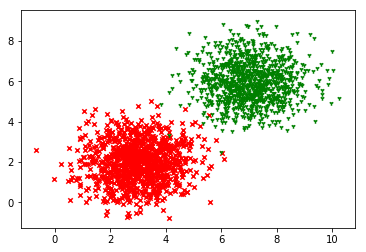

In [158]:
# show dataset by scatter
plt.scatter(x1_for_label_1, x2_for_label_1, c='r', marker='x', s=20)
plt.scatter(x1_for_label_2, x2_for_label_2, c='g', marker='1', s=20)
plt.show()

In [159]:
# set x, y and w variable
X1 = tf.placeholder(tf.float32, shape=(None, ), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None, ), name="x2")
Y = tf.placeholder(tf.float32, shape=(None, ), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [160]:
# produce model, cost and optimizer function
y_model = tf.sigmoid(w[2]*X2 + w[1]*X1 + w[0])
cost = tf.reduce_mean(
    -tf.log(y_model * Y + (1-y_model) * (1 - Y))
)
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [161]:
# train the model with session. if the error is less than 0.0001, then break
# show w
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(tot_epoch):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y:ys})
        # print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w)

In [162]:
print(w_val)
# calculate boundary for decision
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test * w_val[2] - x1_test * w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

[-5.3034754   0.45611814  0.8533812 ]


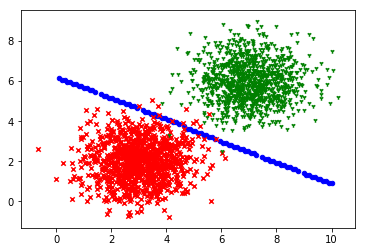

In [163]:
# show dataset and boundary
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_for_label_1, x2_for_label_1, c='r', marker='x', s=20)
plt.scatter(x1_for_label_2, x2_for_label_2, c='g', marker='1', s=20)
plt.show()
